<a href="https://colab.research.google.com/github/WambuiKahuthu/MORINGA_CORE_WEEK2_DESCRIPTIVE_STATISTICS/blob/main/Moringa_Data_Science_Core_W2_Independent_Project_2021_08_Wambui_Kahuthu_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysing Factors that Determine Access to Bank Accounts for Induividuals in Kenya, Uganda, Tanzania, and Rwanda

## Defining the Question

### a. Specifying the data analytic question
> The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account.

### b. Defining the metric for success       
The project will be considered successful when we create machine learning models with high accuracy scores

### c. Understanding the context     
Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account. Our solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

### d. Recording the experimental design     
In order to work on the above problem, we need to do the following:

a. Acquire the dataset with appropriate data for our project     
b. Find and deal with outliers, anomalies, and missing data within the dataset     
c. Perform univariate, bivariate and multivariate analysis while recording our observations     
d. Implement the solution by performing the respective analysisprincipal component analysis, and discriminant analysis     
e. Challenge your solution by providing insights on how you can make improvements

### e. Data relevance
The relevant dataset for this project is one that contains data on the bank usage of individuals in Kenya, Rwanda, Tanzania, and Uganda while specifying different demographic factors that may influence their financial outcomes

## 2. Loading Our Libraries

In [90]:
# Importing Numpy
import numpy as np

# Importing Pandas
import pandas as pd

# Importing Matplotlib
import matplotlib.pyplot as plt

# Importing Seaborn
import seaborn as sns

## 3. Reading the Data

In [182]:
# Loading csv file from the given url http://bit.ly/FinancialDataset

financial_df = pd.read_csv('http://bit.ly/FinancialDataset')

## 4. Checking the Data

In [183]:
# Previewing the top of our dataset

financial_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [184]:
# Previewing the bottom of our dataset

financial_df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [185]:
# Checking general information of the dataframe

financial_df.info()

# Displays number of entries and columns, column names, number of non-null values in every column, data types of each column, distribution of each data type and memory usage of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


## 5. External Data Source Validation

In [189]:
# Checking the proportions of bank usage among the individuals
financial_df['Has a Bank account'].value_counts(normalize=True)

No     0.85912
Yes    0.14088
Name: Has a Bank account, dtype: float64

External data from [link](https://moringaschool.instructure.com/courses/352/pages/friday-independent-project-week-2?module_item_id=27840https://) indicates that only 13.9% of the population in East African have or access bank accounts. Our data shows that 14.08% of the individuals in the sample population have or access a bank account. The difference is only 0.18%, meaning that data in our dataset is valid

At this point we compare our data set with 

## 6. Cleaning the Data

In [95]:
# Checking for null values

financial_df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [96]:
# Dealing with the missing values
# 
financial_df = financial_df.dropna()

In [97]:
# Determining the sum of duplicated values
financial_df.duplicated().sum().sum()

0

In [98]:
# Standardizing column names
# Removing white spaces, lowering the case, replacing spaces with _, and removing brackets 
financial_df.columns = financial_df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# Renaming some column names
financial_df.rename({'has_a_bank_account': 'bank_account', 'type_of_location': 'location', 'cell_phone_access' : 'phone', 'respondent_age':'age', 'gender_of_respondent':'gender', 'the_relathip_with_head' : 'relationship_with_head', 'level_of_educuation' : 'education_level'}, axis=1, inplace=True)

# Dispalying the column names
financial_df.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location', 'phone',
       'household_size', 'age', 'gender', 'relationship_with_head',
       'marital_status', 'education_level', 'type_of_job'],
      dtype='object')

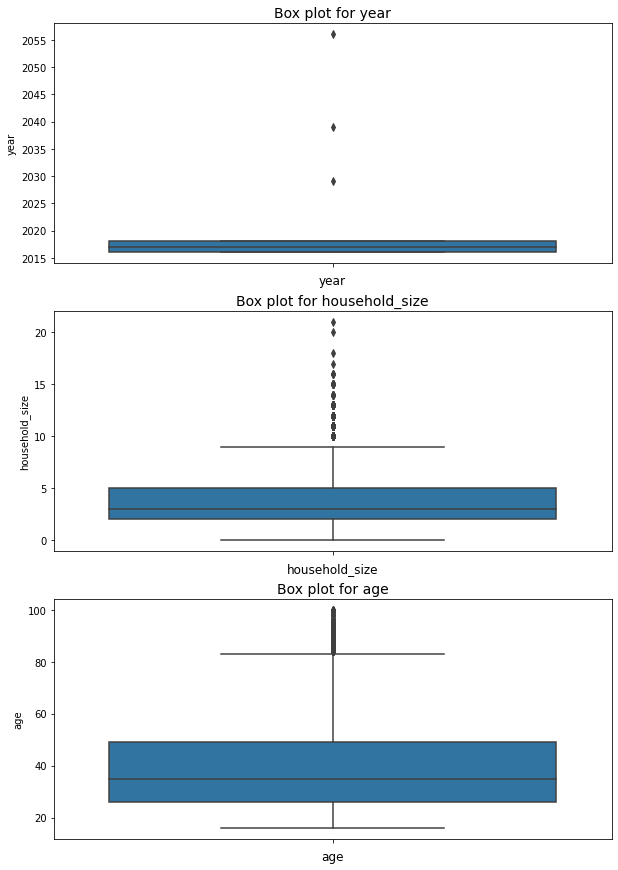

In [99]:
# Checking for Outliers
col_names= ['year', 'household_size', 'age',]

fig, ax = plt.subplots(len(col_names), figsize=(10,15))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=financial_df[col_val], ax=ax[i])
    ax[i].set_title('Box plot for {}'.format(col_val), fontsize=14)
    ax[i].set_xlabel(col_val, fontsize=12)

Outliers in the 'year' column may indicate a data entry error as the years data collection in the different countries are from 2016 to 2018; therefore we will remove them. In as much as the outliers in 'age' and 'household_size' columns may be due to the diversity of the respondents, they will tremendously affect the means, variances, and skewness of the variables; therefore we will remove them too. 

In [100]:
# Removing outliers
Q1 = financial_df.quantile(0.25)
Q3 = financial_df.quantile(0.75)
IQR = Q3 - Q1
financial_df = financial_df[~((financial_df < (Q1 - 1.5 * IQR)) | (financial_df > (Q3 + 1.5 * IQR))).any(axis=1)]

Checking for anomalies in the columns with categorical variables

In [101]:
# Finding out the unique values in 'age' column
financial_df['age'].unique()

array([24., 70., 26., 34., 32., 42., 54., 76., 40., 69., 64., 31., 38.,
       47., 27., 48., 25., 21., 18., 22., 58., 55., 62., 29., 35., 45.,
       67., 19., 80., 66., 50., 33., 28., 51., 16., 17., 30., 37., 59.,
       65., 46., 56., 52., 43., 49., 44., 72., 53., 63., 39., 81., 78.,
       36., 20., 60., 23., 71., 57., 68., 41., 61., 75., 73., 74., 77.,
       82., 79., 83.])

The 'age' column has no anomaly

In [102]:
# Finding out the unique values in 'household_size' column
financial_df['household_size'].unique()

array([3., 5., 8., 7., 1., 6., 4., 2., 9., 0.])

0 is an anomaly in the 'house_hold' size column

In [103]:
# Finding out the number of recors with '0' as the household_size
financial_df[(financial_df['household_size']==0)].shape

(27, 13)

Since 27 is a very small number compared to the total number of records, we can remove the records with '0' in the 'household_size' column in order to have an anomaly free dataset while still maintaining the quality of the data

In [104]:
# Dropping the entries with '0' in 'household_size' column
financial_df.drop(financial_df.index[financial_df['household_size'] == 0], inplace = True)

In [105]:
# Finding out the unique values in the 'Country' column
financial_df['country'].unique()

array(['Kenya', 'Rwanda', 'Tanzania', 'Uganda'], dtype=object)

The 'country' column has no anomaly


In [106]:
# Finding out the unique values in 'bank_account' column
financial_df['bank_account'].unique()


array(['Yes', 'No'], dtype=object)

The 'bank_account' column has no anomaly

In [107]:
# Finding out the unique values in 'location' column
financial_df['location'].unique()

array(['Rural', 'Urban'], dtype=object)

The 'location' column has no anomaly

In [108]:
# Finding out the unique values in 'phone' column
financial_df['phone'].unique()

array(['Yes', 'No'], dtype=object)

The 'phone' column has no anomaly

In [109]:
# Finding out the unique values in 'gender' column
financial_df['gender'].unique()

array(['Female', 'Male'], dtype=object)

The 'gender' column has no anomaly

In [110]:
# Finding out the unique values in 'relationship_with_head' column
financial_df['relationship_with_head'].unique()

array(['Spouse', 'Head of Household', 'Other relative', 'Child', 'Parent',
       'Other non-relatives'], dtype=object)

The 'relationship_with_head' column has no anomaly

In [111]:
# Finding out the unique values in 'marital_status' column
financial_df['marital_status'].unique()

array(['Married/Living together', 'Widowed', 'Single/Never Married',
       'Divorced/Seperated', 'Dont know'], dtype=object)

The 'marital_status' column has no anomaly

In [112]:
# Finding out the unique values in 'education_level' column
financial_df['education_level'].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA', '6'], dtype=object)

'6' seems to be an anomaly in the 'education_level' column

In [113]:
# Finding out the number of entries with '6' in the 'education_level' 
financial_df[(financial_df['education_level']=='6')].shape

(25, 13)

Since 25 is a very small number compared to the total number of records, we can remove the records with '6' in the 'education_level' column in order to have an anomaly free dataset while still maintaining the quality of the data

In [114]:
# Dropping the entries with '6' in 'education_level' column
financial_df.drop(financial_df.index[financial_df['education_level'] == '6'], inplace = True)

In [115]:
# Finding out the unique values in 'gender' column
financial_df['type_of_job'].unique()

array(['Self employed', 'Government Dependent',
       'Formally employed Private', 'Informally employed',
       'Formally employed Government', 'Farming and Fishing',
       'Remittance Dependent', 'Other Income',
       'Dont Know/Refuse to answer', 'No Income'], dtype=object)

The 'type_of_job' column has no anomaly

In [116]:
# Dropping irrelevant columns
financial_df.drop(['year'], axis=1, inplace=True)

In [117]:
# Finding the number of records remaining after cleaning
financial_df.shape

(22673, 12)

## 7. Exploratory Analyses

### a. Univariate analysis

#### i. Categorical variables

#### Recommendation for effectively performing univariate analysis while working on the current problem.

Univariate analysis is a form of data analysis where the data being analysed involves only one variable. In order to accomplish our objective of finding how we can predict which individuals are most likely to have or use a bank account, while performing univariate analysis, we will need to pick a variable from the dataset then subdivide the dataset into subdatasets based on the unique values of the selected variable. In each subset, we will pick 'bank_account' (the column that shows bank usage among the individuals in the subset) as our variable of interest and perform univariate analysis. For an example, we will pick education level as our variable for investigation, subdivide the dataset into subsets based on its unique entries then conduct univariate analysis in each subset with 'bank_account' being the variable of interest. This will help us know how likely an individual is to have a bank account based on his/her level of education.This  approach, even though taxing, could be applied on any of the other variables, i.e., type of job, age, gender of respondent, etc. 




Understanding the individuals from whom data was collected

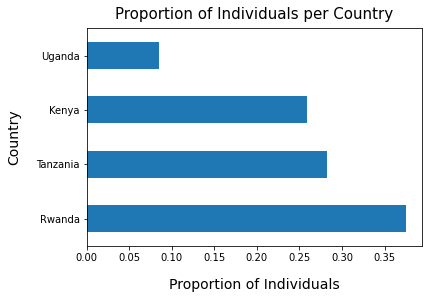

In [118]:
# Creating a bar chart for the proportion of count of values in 'country' column

#plotting a bar graph
(financial_df['country'].value_counts(normalize=True)).plot.barh()

# labelling the bar chart 
plt.title('Proportion of Individuals per Country', fontsize=15, y=1.015)
# labelling the x axis 
plt.xlabel('Proportion of Individuals', fontsize=14, labelpad=15)
# labelling the y axis
plt.ylabel('Country', fontsize=14, labelpad=15)
#display bar chart
plt.show()

37.47% of the individuals were from Rwanda, 28.20% from Tanzania, 25.88% from Kenya, and 8.45% from Uganda 

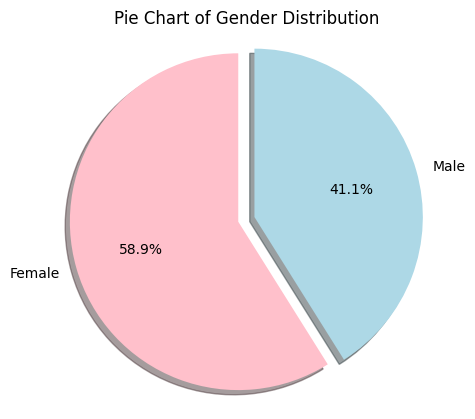

In [119]:
# Creating a pie chart of the percentage of count of values in 'gender' column

# Finding the count of values of the elements in 'bank_account' column
gender = financial_df.gender.value_counts()
gender

# Assigning the colums to 'element' and 'size' variables
element = gender.values
size = gender.index

# Specifying the colors of the pie chart
colors = ['pink', 'lightblue']

# plotting the pie chart
plt.figure(figsize = (5,5), dpi = 100)
plt.pie(element, labels=size, colors=colors, autopct ='%1.1f%%', shadow =True, explode=(0.1,0), startangle = 90)
plt.axis('equal')
plt.title('Pie Chart of Gender Distribution')
plt.show()

58.9% of respondents were female and 41.1% were male

Let us find the overall usage of commercial banks by individuals in the sample population

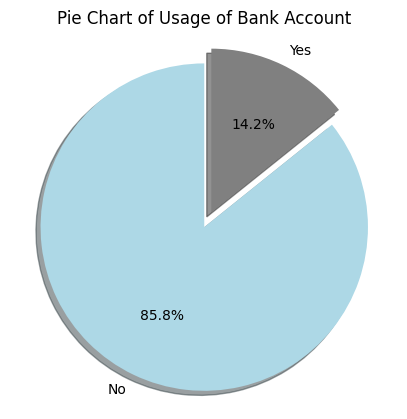

In [120]:
# Creating a pie chart of the percentage of count of values in 'bank_account' column

# Finding the count of values of the elements in 'bank_account' column
bank_usage = financial_df.bank_account.value_counts()
bank_usage

# Assigning the colums to 'element' and 'size' variables
element = bank_usage.values
size = bank_usage.index

# Specifying the colors of the pie chart
colors = ['lightblue', 'gray']

# plotting the pie chart
plt.figure(figsize = (5,5), dpi = 100)
plt.pie(element, labels=size, colors=colors, autopct ='%1.1f%%', shadow =True, explode=(0.1,0), startangle = 90)
plt.axis('equal')
plt.title('Pie Chart of Usage of Bank Account')
plt.show()


Information prior to this analysis indicated that about 13.9% of the adult population in Kenya, Uganda, Tanzania and Rwanda have access to or use a commercial bank account. Our findings show that only 14.2% of the population sample have access to or use a commercial bank account. The difference is only 0.3% meaning that this sample can almost accurately represent the population.

Let us find the proportion of bank usage of the individuals per level of education

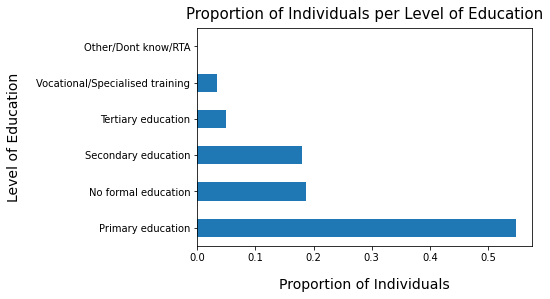

In [121]:
# Creating a bar chart for the proportion of count of values in 'education_level' column

#plotting a bar graph
(financial_df['education_level'].value_counts(normalize=True)).plot.barh()

# labelling the bar chart 
plt.title('Proportion of Individuals per Level of Education', fontsize=15, y=1.015)
# labelling the x axis 
plt.xlabel('Proportion of Individuals', fontsize=14, labelpad=15)
# labelling the y axis
plt.ylabel('Level of Education', fontsize=14, labelpad=15)
#display bar chart
plt.show()

The analysis shows that the highest level of education for a majority of the individuals (54.82%) is primary education, followed by no formal education (18.63%), secondary education (18.07%), tertiary education (5%), vocational/specialised training (3.46%) and lastly 0.03% of the individuals fall under others/don't know/RTA

In the following univariate analyses of categorical variables, we will analyse the usage of commercial bank accounts based the levels of education of the individuals in the sample population

In [122]:
# Creating a dataframe of individuals with secondary education as highest level of education
secondary = financial_df[(financial_df['education_level']=='Secondary education')]

# Creating a dataframe of individuals with no formal education as highest level of education
no_formal = financial_df[(financial_df['education_level']=='No formal education')]

# Creating a dataframe of individuals with vocational/specialized training as highest level of education
specialized_training = financial_df[(financial_df['education_level']=='Vocational/Specialised training')]

# Creating a dataframe of individuals with primary education as highest level of education
primary = financial_df[(financial_df['education_level']=='Primary education')]

# Creating a dataframe of individuals with tertiary education as highest level of education
tertiary = financial_df[(financial_df['education_level']=='Tertiary education')]

# Creating a dataframe of individuals with other/unkown/RTA as highest level of education
other = financial_df[(financial_df['education_level']=='Other/Dont know/RTA')]

In [123]:
# Creating a frequency table for proportion of bank usage among individuals with other/unkown/RTA as highest level of education
other.bank_account.value_counts(normalize=True)

Yes    1.0
Name: bank_account, dtype: float64

Out of the 0.03% of the individuals in the population with other/unknown/RTA as their highest level of education, 100% percent of them are likely to have a bank account 

In [124]:
# Creating a frequency table for proportion of bank usage among individuals with no formal as highest level of education
no_formal.bank_account.value_counts(normalize=True)

No     0.961893
Yes    0.038107
Name: bank_account, dtype: float64

Out of the 18.63% of the individuals in the population with no formal education as their highest level of education, only 3.81% percent of them are likely to have a bank account, and 96.19% of them are likely to not have a bank account

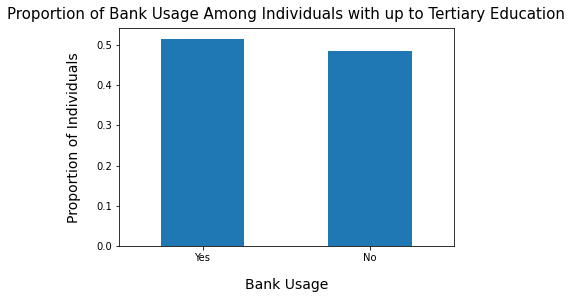

In [125]:
# Creating a bar chart for proportion of bank usage among individuals with tertiary education as highest level of education
(tertiary['bank_account'].value_counts(normalize=True)).plot.bar()

# labelling the bar chart 
plt.title('Proportion of Bank Usage Among Individuals with up to Tertiary Education', fontsize=15, y=1.015)
# labelling the x axis 
plt.xlabel('Bank Usage', fontsize=14, labelpad=15)
# rotating the labels on the x axis
plt.xticks(rotation = 360)
# labelling the y axis
plt.ylabel('Proportion of Individuals', fontsize=14, labelpad=15)
#display bar chart
plt.show()

Out of the 5% of the individuals in the population with tertiary education as their highest level of education, 51.59% percent of them are likely to have a bank account while  48.41% of them are likely to not have a bank account

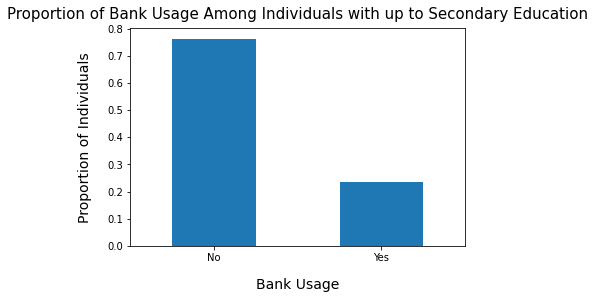

In [126]:
# Creating a bar chart for proportion of bank usage among individuals with secondary education as highest level of education
(secondary['bank_account'].value_counts(normalize=True)).plot.bar()

# labelling the bar chart 
plt.title('Proportion of Bank Usage Among Individuals with up to Secondary Education', fontsize=15, y=1.015)
# labelling the x axis 
plt.xlabel('Bank Usage', fontsize=14, labelpad=15)
# rotating the labels on the x axis
plt.xticks(rotation = 360)
# labelling the y axis
plt.ylabel('Proportion of Individuals', fontsize=14, labelpad=15)
#display bar chart
plt.show()


Out of the 18.07% of the individuals in the population with secondary education as their highest level of education, only 23.63% percent of them are likely to have a bank account while 76.36% of them are likely to not have a bank account

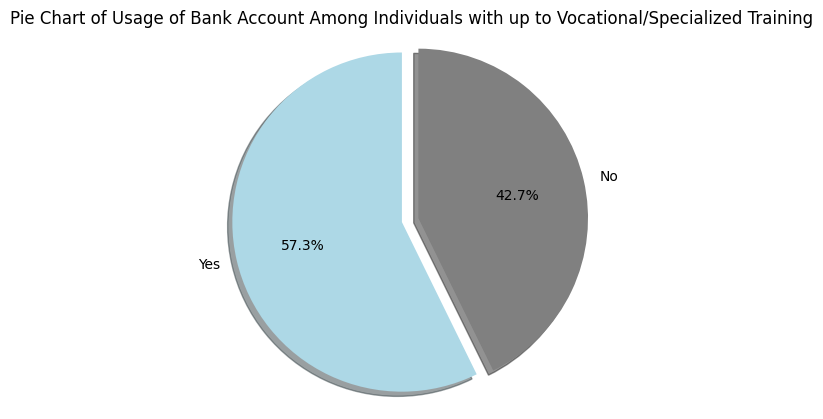

In [127]:
# Creating a pie chart of the percentage of bank usage among idividuals with vocational/specialized training as their highest level of education

# Finding the count of values of the elements in 'bank_account' column
bank_usage = specialized_training.bank_account.value_counts()
bank_usage

# Assigning the colums to 'element' and 'size' variables
element = bank_usage.values
size = bank_usage.index

# Specifying the colors of the pie chart
colors = ['lightblue', 'gray']

# plotting the pie chart
plt.figure(figsize = (5,5), dpi = 100)
plt.pie(element, labels=size, colors=colors, autopct ='%1.1f%%', shadow =True, explode=(0.1,0), startangle = 90)
plt.axis('equal')
plt.title('Pie Chart of Usage of Bank Account Among Individuals with up to Vocational/Specialized Training')
plt.show()

Out of the 3.46% of the individuals in the population with vocational/specialized training as their highest level of education, 57.3% percent of them are likely to have a bank account while 42.7% are likely to not have a bank account

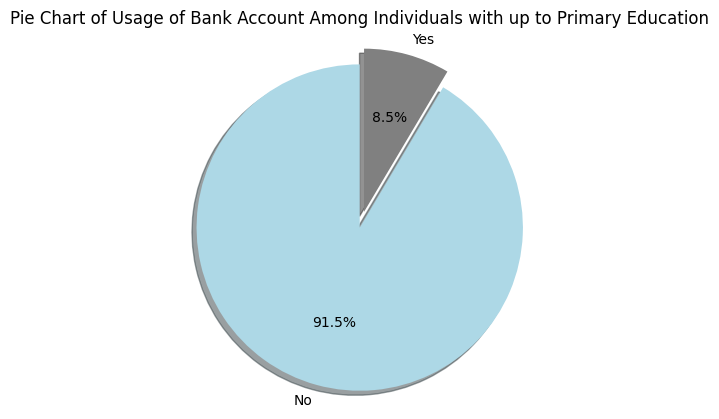

In [128]:
# Creating a pie chart of the percentage of bank usage among idividuals with primary education training as their highest level of education

# Finding the count of values of the elements in 'bank_account' column
bank_usage = primary.bank_account.value_counts()
bank_usage

# Assigning the colums to 'element' and 'size' variables
element = bank_usage.values
size = bank_usage.index

# Specifying the colors of the pie chart
colors = ['lightblue', 'gray']

# plotting the pie chart
plt.figure(figsize = (5,5), dpi = 100)
plt.pie(element, labels=size, colors=colors, autopct ='%1.1f%%', shadow =True, explode=(0.1,0), startangle = 90)
plt.axis('equal')
plt.title('Pie Chart of Usage of Bank Account Among Individuals with up to Primary Education')
plt.show()

Out of the 54.82% of the individuals in the population with primary education as their highest level of education, only 8.5% percent of them are likely to have a bank account while 91.5% are likely to not have a bank account

#### ii. Numerical variables

Univariate analysis of numerical variables will help us understand the individuals in the sample population better     
Our numerical variables are household_size and age

##### Measures of central tendency




###### Age

In [129]:
# Finding the mean age of individuals in the sample population
financial_df['age'].mean()

38.32677634190447

The mean age of the individuals in the sample population is 38.33

In [130]:
# Finding the modal age of individuals in the sample population
financial_df['age'].mode()


0    30.0
dtype: float64

The modal age of the individuals in the sample population is 30

In [131]:
# Finding the median age of individuals in the sample population
financial_df['age'].median()

35.0

The median age of the individuals in the sample population is 35

###### Household size

In [132]:
# Finding the mean household size of individuals in the sample population
financial_df['household_size'].mean()

3.5841309046001855

The mean of the household size of the individulas in the sample population is 3.58

In [133]:
# Finding the modal household size of individuals in the sample population
financial_df['household_size'].mode()

0    2.0
dtype: float64

The modal household size of the individuals in the sample population is 2

In [134]:
# Finding the median household size of individuals in the sample population
financial_df['household_size'].median()

3.0

The median household size of the individuals in the sample pupulation is 3

##### Measures of dispersion

###### Age

In [135]:
# Calculating the standard deviation
financial_df['age'].std()

15.786798363248979

A standard deviation of 15.79 indicates that the values are moderately close to the mean

In [136]:
# Calculating the variance 
financial_df['age'].var()

249.22300256188063

A variance of 249.22 means that values are dispersed


In [137]:
# Calculating the range
max_age = financial_df['age'].max()
min_age = financial_df['age'].min()

max_age - min_age

67.0

The range value shows length/difference between the maximum age and the minimum age is 67

In [138]:
# Calculating the quantiles 
financial_df['age'].quantile([0.25,0.5,0.75])

0.25    26.0
0.50    35.0
0.75    48.0
Name: age, dtype: float64

The quatile values indicate that25% of the values fall below 26, 50% of the values fall below and above 35, and 75% of the values fall below 48

In [139]:
# Calculating the interquatile range
Q3 = financial_df['age'].quantile(0.75)
Q1 =financial_df['age'].quantile(0.25)

Q3-Q1

22.0

The range between the middle 50% of the values is 22

In [140]:
# Calculating the skewness 
financial_df['age'].skew()

0.7409568877240711

0.74 skewness means that the tail on the right side is longer than on the left side and that the mean is greater than the mode

In [141]:
# Calculating the kurtosis
financial_df['age'].kurt()

-0.23371796802058498

-0.23 kurtosis means that the distribution has thinner tails than in a normal distribution has fewer values in is shorter tails

###### Household size 

In [142]:
# Calculating the standard deviation
financial_df['household_size'].std()

2.078044253802465

A standard deviation of 2.07 indicates that the values are close to the mean

In [143]:
# Calculating the variance
financial_df['household_size'].var()

4.3182679207614445

A variance of 4.31 means that the values are not so spread out from one another

In [144]:
# Calculating the range
max_household_size = financial_df['household_size'].max()
min_household_size = financial_df['household_size'].min()

max_household_size - min_household_size

8.0

The range value shows that the length/difference between the maximum value of and minimum value of household size is 8

In [145]:
# Calculating the quantiles
financial_df['household_size'].quantile([0.25, 0.5, 0.75])

0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64

The quatiles values indicate that 25% of the values fall below 2, 50% of the values fall below and above 3, and 75% of the values fall below 5 

In [146]:
# Calculating the interquantile range
Q3 = financial_df['household_size'].quantile(0.75)
Q1 = financial_df['household_size'].quantile(0.25)

Q3-Q1

3.0

The range between the middle 50% of the values is 3

In [147]:
# Calculating the skewness
financial_df['household_size'].skew()

0.6089019273573075

0.61 skewness means that the tail on the right side is longer than on the left side and that the mean is greater than the mode

In [148]:
# Calculating the kurtosis
financial_df['household_size'].kurt()

-0.5056159678414698

-0.51 kurtosis means that the distribution has thinner tails than in a normal distribution has fewer values in is shorter tails

##### Visualizations of distributions of numerical variables

###### Age

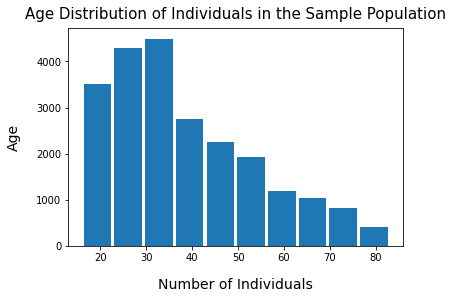

In [149]:
# Creating a histogram to visualize the age distribution of individuals in the sample population

# Assigning the age column to variable ages
ages = financial_df['age']

# plotting a histogram
plt.hist(ages, bins=10, histtype='bar', rwidth=0.9)
# labelling x axis
plt.xlabel('Number of Individuals', fontsize=14, labelpad=15)
# labelling the y axis
plt.ylabel('Age', fontsize=14, labelpad=15)
# Giving the histogram a title
plt.title('Age Distribution of Individuals in the Sample Population', fontsize=15, y=1.015)
# displaying the histogram
plt.show()

The right-skewed histogram shows that the mode of the ages of the individuals in the sample population is closer to the left of the graph and smaller than the mean or/and the median and the mean is greater than the median or/and the mode

###### Household size

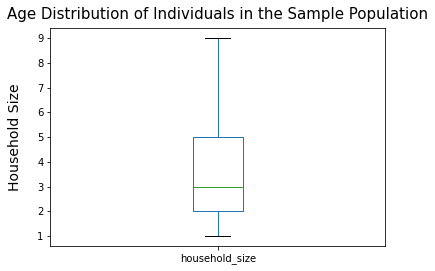

In [150]:
# Creating a box plot to visualize the distribution of household size of the individuals in the sample population

# Plotting the boxplot
financial_df.boxplot(['household_size'], grid=False)
# labelling the y axis
plt.ylabel('Household Size', fontsize=14, labelpad=15)
# Giving the box plot a title
plt.title('Age Distribution of Individuals in the Sample Population', fontsize=15, y=1.015)
# displaying the histogram
plt.show()

The box plot shows that the minimum household size is 1, the maximum is 9, 25% of the household sizes fall below 2, 25% of the household sizes fall above 5 and the median household size is 3


### b. Bivariate analysis

#### i. Numerical to numerical

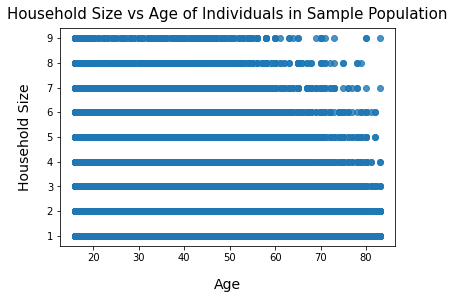

In [151]:
# Creating a scatter plot between age and household size of the individuals in the sample population
sns.regplot(x = financial_df["age"], y = financial_df["household_size"], fit_reg=False)

# Givint the scatterplot a title
plt.title('Household Size vs Age of Individuals in Sample Population', fontsize=15, y=1.015)
# Labelling the x axis
plt.xlabel('Age', fontsize=14, labelpad=15)
# Labelling the y axis
plt.ylabel('Household Size', fontsize=14, labelpad=15)
# Displaying the scatterplot
plt.show()

The scatterplot shows that the household size of the individuals in the sample size is not correlated to their age

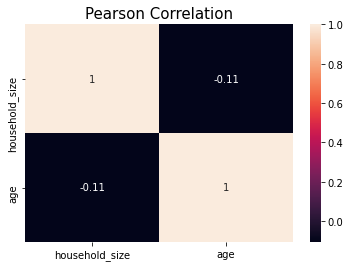

In [152]:
#Calculating pearson correlation of numerical variables
pearson_corr = financial_df.corr()

# Plotting a correlation heat map
sns.heatmap(pearson_corr, xticklabels=pearson_corr.columns, yticklabels=pearson_corr.columns, annot=True)
# Giving the heatmap a title
plt.title('Pearson Correlation', fontsize=15, y=1.015)
# Displaying the heatmap
plt.show()

A pearson coefficient of -0.11 means that household size and age of respondents have a very weak inverse correlation.  

#### ii. Categorical to categorical

#### Recommendations for effectively performing bivariate analysis while working on the current problem     

For univariate analysis, we had to subdivide the dataset into different subsets based on the unique values of a given variable in order to investigate the likelihood of bank usage among the individuals in the subsets. In bivariate analysis (analysis of data involving two variables), we can investigate the bank usage among the individuals per variable without breaking down the dataset into subsets of the unique values of the variables. For examples, we will investigate bank usage among the individuals in the sample population based on their gender, location, age and phone use and the findings will be presented in stacked column charts. The bivariate analysis could be done on the other variables i.e. marital status, type of job, relationship with head, etc., so as to gain insights of how the different demographic factors might drive individual's financial outcomes.

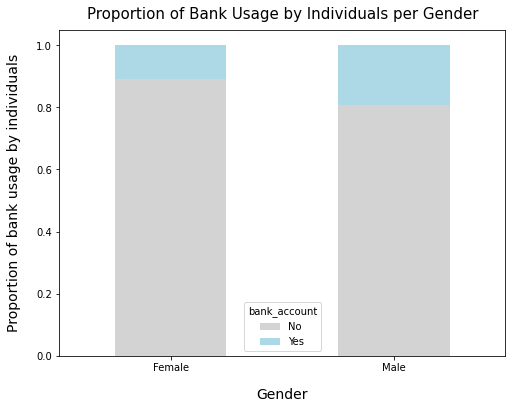

In [153]:
# Grouping proportion of bank usage by individuals per gender
gender=financial_df.groupby('gender')['bank_account'].value_counts(normalize=True).unstack()

# Specifying the colors of the stacked columns
colors= ['lightgray', 'lightblue']
# Plotting the chart
gender.plot(kind='bar', figsize=(8, 6), color=colors, stacked=True)
# Giving the chart a title
plt.title('Proportion of Bank Usage by Individuals per Gender', fontsize=15, y=1.015)
# Labelling the x axis
plt.xlabel('Gender', fontsize=14, labelpad=15)
# rotating the labels on the x axis
plt.xticks(rotation = 360)
# Labellinbg the y axis
plt.ylabel('Proportion of bank usage by individuals', fontsize=14, labelpad=15)
# Displaying the chart
plt.show()

Males have a higher likelihood of having bank accounts compared to women. There is a 19.10% chance that a male has a bank account and 10.85% chance that a female has a bank account

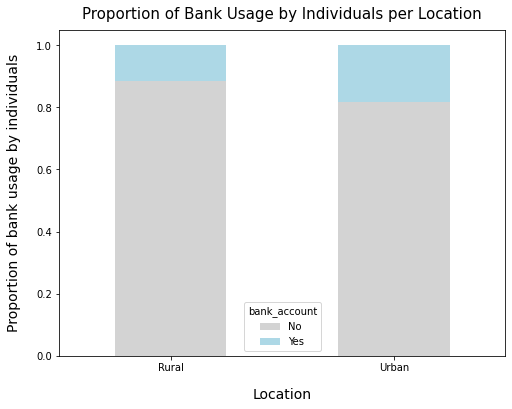

In [154]:
# Grouping proportion of bank usage by individuals per location
location=financial_df.groupby('location')['bank_account'].value_counts(normalize=True).unstack()

# Specifying the colors of the stacked columns
colors= ['lightgray', 'lightblue']
# Plotting the chart
location.plot(kind='bar', figsize=(8, 6), color=colors, stacked=True)
# Giving the chart a title
plt.title('Proportion of Bank Usage by Individuals per Location', fontsize=15, y=1.015)
# Labelling the x axis
plt.xlabel('Location', fontsize=14, labelpad=15)
# rotating the labels on the x axis
plt.xticks(rotation = 360)
# Labellinbg the y axis
plt.ylabel('Proportion of bank usage by individuals', fontsize=14, labelpad=15)
# Displaying the chart
plt.show()

Individuals in the urban areas have a higher likelihood of having bank accounts than individuals in the rural areas. There is a 18.19% chance that an individual in the urban area has a bank account and 11.69% chance that an individual in the rural area has a bank account

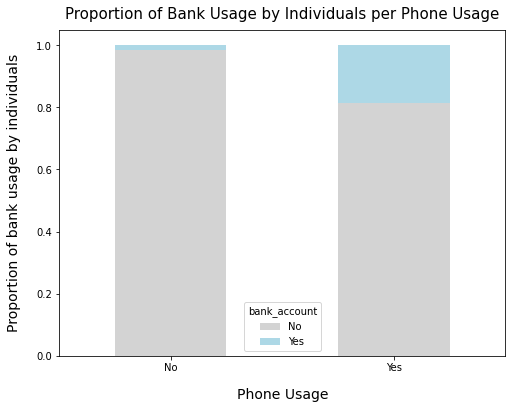

In [155]:
# Grouping proportion of bank usage by individuals per phone usage
phone=financial_df.groupby('phone')['bank_account'].value_counts(normalize=True).unstack()

# Specifying the colors of the stacked columns
colors= ['lightgray', 'lightblue']
# Plotting the chart
phone.plot(kind='bar', figsize=(8, 6), color=colors, stacked=True)
# Giving the chart a title
plt.title('Proportion of Bank Usage by Individuals per Phone Usage', fontsize=15, y=1.015)
# Labelling the x axis
plt.xlabel('Phone Usage', fontsize=14, labelpad=15)
# rotating the labels on the x axis
plt.xticks(rotation = 360)
# Labellinbg the y axis
plt.ylabel('Proportion of bank usage by individuals', fontsize=14, labelpad=15)
# Displaying the chart
plt.show()

Individuals with phones have a higher likelihood of having bank accounts than individuals with no phones. There is a 18.49% chance that an individual with a phone has a bank account and 1.62% chance that an individual with no phone has a bank account

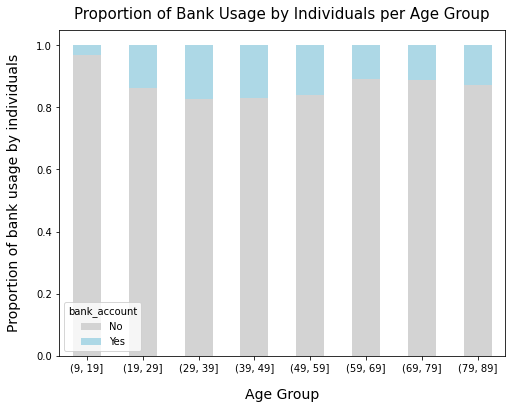

In [156]:
# Creating a new column for age groups for easier analysis of ages
financial_df['age_group']= pd.cut(x=financial_df['age'], bins=[9, 19, 29, 39, 49, 59, 69, 79, 89])

#
# Grouping proportion of bank usage by individuals per phone usage
age=financial_df.groupby('age_group')['bank_account'].value_counts(normalize=True).unstack()

# Specifying the colors of the stacked columns
colors= ['lightgray', 'lightblue']
# Plotting the chart
age.plot(kind='bar', figsize=(8, 6), color=colors, stacked=True)
# Giving the chart a title
plt.title('Proportion of Bank Usage by Individuals per Age Group', fontsize=15, y=1.015)
# Labelling the x axis
plt.xlabel('Age Group', fontsize=14, labelpad=15)
# rotating the labels on the x axis
plt.xticks(rotation = 360)
# Labellinbg the y axis
plt.ylabel('Proportion of bank usage by individuals', fontsize=14, labelpad=15)
# Displaying the chart
plt.show()

Individuals of ages 30-39 have the highest likelihood of having bank accounts while individuals of ages 10-19 have the least likelihood of having bank accounts. An individual of age 30-39 has a 17.45% likelihood of having a bank account, an individual of age 40-49 has a 16.91% likelihood of having a bank account, an individual of age  50-59 has a 16.08% likelihood of having a bank account... an individual of age 60-69 has a 10.96% likelihood of having a bank account, an individual of age 70-79 has a 11.14% likelihood of having a bank acount and an individual of age 10-19 has a 3.16% likelihood of having a bank account.

## 8. Implementing the Solutions     


### c. Multivariate analysis

#### Recommendations for effectively performing multivariate analysis while working on the current problem     

Since most of the values in the different variables were categorical, it necessaery to use multivariate analysis techniques that will allow encoding of the values for better ananlysis 

#### i. Principal Component Analysis 

Principal component analysis, or PCA, is a statistical technique to convert high dimensional data to low dimensional data by selecting the most important features that capture maximum information about the dataset. The features are selected on the basis of variance that they cause in the output. The feature that causes highest variance is the first principal component. The feature that is responsible for second highest variance is considered the second principal component, and so on. It is important to mention that principal components do not have any correlation with each other

In [157]:
# Making a copy of our dataset
financial_copy= financial_df.copy()

In [158]:
financial_copy.columns

Index(['country', 'uniqueid', 'bank_account', 'location', 'phone',
       'household_size', 'age', 'gender', 'relationship_with_head',
       'marital_status', 'education_level', 'type_of_job', 'age_group'],
      dtype='object')

In [159]:
# Importing LabelEncoder
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

# Encoding categorial values
financial_copy['country']=lb.fit_transform(financial_copy['country'].astype(str))
financial_copy['location']=lb.fit_transform(financial_copy['location'].astype(str))
financial_copy['phone']=lb.fit_transform(financial_copy['phone'].astype(str))
financial_copy['gender']=lb.fit_transform(financial_copy['gender'].astype(str))
financial_copy['relationship_with_head']=lb.fit_transform(financial_copy['relationship_with_head'].astype(str))
financial_copy['marital_status']=lb.fit_transform(financial_copy['marital_status'].astype(str))
financial_copy['education_level']=lb.fit_transform(financial_copy['education_level'].astype(str))
financial_copy['type_of_job']=lb.fit_transform(financial_copy['type_of_job'].astype(str))

In [160]:
# Displaying the top of our encoded dataframe
financial_copy.head()

,country,uniqueid,bank_account,location,phone,household_size,age,gender,relationship_with_head,marital_status,education_level,type_of_job,age_group
0,0,uniqueid_1,Yes,0,1,3.0,24.0,0,5,2,3,9,"(19, 29]"
1,0,uniqueid_2,No,0,0,5.0,70.0,0,1,4,0,4,"(69, 79]"
2,0,uniqueid_3,Yes,1,1,5.0,26.0,1,3,3,5,9,"(19, 29]"
3,0,uniqueid_4,No,0,1,5.0,34.0,0,1,2,2,3,"(29, 39]"
4,0,uniqueid_5,No,1,0,8.0,26.0,1,0,3,2,5,"(19, 29]"


In [161]:
# Dropping unnecessary colummns
financial_copy.drop(['uniqueid', 'age_group'],axis=1, inplace=True)

In [162]:
# The first preprocessing step is to divide the dataset into a feature set and corresponding labels. 
# The following script performs this task. The script below stores the feature sets into the X variable 
# and the series of corresponding labels in to the y variable.
X = financial_copy.drop('bank_account', 1)
y = financial_copy['bank_account']

In [206]:
# The next preprocessing step is to divide data into train and test sets by executing the following script

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [208]:
# PCA performs best with a normalized feature set. We will perform standard scalar normalization to normalize our feature set by executing the following code

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [165]:
# We perform PCA using Python's Scikit-Learn library. 
from sklearn.decomposition import PCA

# Initialize the PCA class by passing the number of components to the constructor.
pca = PCA()

# Call the fit and then transform methods by passing the feature set to these methods. 
# The transform method returns the specified number of principal components.
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

#In the code above, we create a PCA object named pca. 
# We did not specify the number of components in the constructor. 
# Hence, all the features in the feature set will be returned for both the training and test sets.

In [166]:
# The PCA class contains explained variance ratio which returns the variance caused by each of the principal components. 
# We execute the following line of code to find the "explained variance ratio".
explained_variance = pca.explained_variance_ratio_

# Displaying the explained variance ratio 
explained_variance

# The explained_variance variable is a float type array which contains variance ratios for each principal component. 
# It can be seen that first principal component is responsible for 19.30% variance, the second principal component causes 15.90% variance in the dataset, and so forth 
# Collectively we can say that (19.30 + 15.90) 35.20% percent of the classification information contained in the feature set is captured by the first two principal components.

array([0.19302393, 0.1590122 , 0.15552684, 0.10135335, 0.08272713,
       0.08076231, 0.07254645, 0.05774638, 0.05401757, 0.04328384])

In [167]:
# Use 1 principal component to train our algorithm by executing the following code
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [168]:
# Use random forest classification for training and making the predictions
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [169]:
# Performance Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

# Noting that from the output, with only one feature, the random forest algorithm is 85.69% accurate.

[[3886    0]
 [ 649    0]]
Accuracy 0.8568908489525909


In [198]:
# Evaluating classification performance of the random forest algorithm with 2 of the principal components

# Divide data into train and test sets by executing the following script
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Perform standard scalar normalization to normalize our feature set by executing the following code
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Use 2 principal components to train our algorithm by executing the following code
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [203]:
# Use random forest classification for training and making the predictions when using two of the principal components
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [200]:
# Performance Evaluation
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

# Noting that from the output that with two features, the random forest algorithm is still 85.69% accurate.

[[3886    0]
 [ 649    0]]
Accuracy 0.8568908489525909


From the above experimentation we achieved optimal level of accuracy while significantly reducing the number of features in the dataset. We saw that accuracy achieved with only 1 principal component is 85.69%. It is also pertinent to mention that the accuracy of a classifier doesn't necessarily improve with increased number of principal components as we can see that the accuracy achieved with one principal component (85.69%) is equal to the accuracy achieved with two principal components (85.69%). With an accuracy of level of 85.69% is safe to say that multivariate analysis through principal component analysis is good enough for the prediction of bank usage by an individual based on his/her characteristics



#### ii. Linear Discriminant Analysis

Linear discriminant analysis (LDA), this is a simple and powerful linear transformation that is most commonly used as dimensionality reduction technique in the pre-processing step for machine learning applications. The goal of linear discriminant analysis is to project a dataset onto a lower-dimensional space with good class-separability in order to avoid overfitting ("curse of dimensionality") and also reduce computational costs. 

In [173]:
# The first preprocessing step is to divide the dataset into a feature set and corresponding labels. 
# The following script performs this task by storing the feature sets into the X variable and the series of corresponding labels in to the y variable.
X = financial_copy.drop('bank_account', 1)
y = financial_copy['bank_account']

In [174]:
# The following code divides data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [175]:
# We now  perform feature scaling by executing the following code
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [209]:
# We perform LDA with Scikit-Learn. 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# We have to pass the value for the n_components parameter of the LDA which refers to the number of linear discriminates that we want to retrieve. 
# In this case we set the n_components to 1, since we first want to check the performance of our classifier with a single linear discriminant. 
lda = LDA(n_components=1)

# Finally we execute the fit and transform methods to actually retrieve the linear discriminants
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [204]:
# We will use the random forest classifier to evaluate the performance of a PCA-reduced algorithms 
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# predicting the results
y_pred = classifier.predict(X_test)
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [178]:
# Evaluate the performance of the algorithm with the help of a confusion matrix and find the accuracy of the prediction 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

# We can see that with one linear discriminant, the algorithm achieved an accuracy of 87.39%, 
# which is greater than the accuracy achieved with one principal component, which was 85.69%.

[[3795   91]
 [ 481  168]]
Accuracy0.8738699007717751


With an accuracy of level of 87.69% is safe to say that multivariate analysis through linear discriminant analysis is good enough for the prediction of bank usage by an individual based on his/her characteristics


## 9. Challenging the Solution     
Given that the accuracy levels of the algorithms for both PCA and LDA analyses are less than 100, there is room for improvement for the solutions.

## 10. Follow up Questions 

**a. Did we have the right data?**     
Yes, the data used in the analysis was right for the project's objective

**b. Do we need other data to answer our question? **    
No, the given data was sufficient for our analysis

**c. Did we have the right question? **    
Yes, the answers to our question provided an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.